## Analyzing ICO of Cryptocurrencies
In this project, we'll analyze ICO of some unique cryptocurrencies. An ICO (Initial Coin Offering) is like a crowdfunding campaign for cryptocurrency projects. ICOs became popular because they allow startups to raise funds quickly and directly from supporters all over the world, without the need for intermediaries. Here we will analyze the coins based on their types, uses cases and platforms.

For this project, we will use ICO Cryptocurrency Dataset found in Kaggle. We will download it using opendatasets library and analyze the data present in it

In [2]:
import pandas as pd
ico_raw_data=pd.read_csv('./ico.csv')
ico_raw_data

,Unnamed: 0,coin_ticker,received_money,sold_coins,role_of_token,category,goal,total_tokens,interest,fundraising_goal,...,ico_token_price,received_money.1,end_date,token_type,available_for_token_sale,min_max_personal_cap,whitelist,accepts,token_issue,cant_participate
0,0,Ozone Metaverse,"$1,430,000","$1,430,000 (100%)",Utility,Platform,"$1,430,000","2,000,000,000",Not Rated,"$280,000",...,1 OZONE = 0.007 USD,"$1,430,000",Ended: 6 Jul 2023,Flow,"21,25%",NaN,NaN,NaN,NaN,NaN
1,1,TypeIT,Pending,NaN,Utility,Blockchain Service,Pending,"1,000,000,000",Not Rated,"22,000,000 Token",...,1 TYPE = 0.05 USD,Pending,Ended: 6 Jul 2023,ERC20,NaN,NaN,NaN,NaN,NaN,NaN
2,2,EGO (Paysenger),"$4,160,000","$4,160,000 (100%)",Utility,Social Network,"$4,160,000","500,000,000",Not Rated,"$859,000",...,1 EGO = 0.06 USD,"$4,160,000",Ended: 5 Jul 2023,BEP-20,26.6%,100$ / 2500$,"Yes (until 24 May,","ETH, USDT, USDC, DOT",NaN,"Afghanistan, Burundi, Central African Republic..."
3,3,Goracle,"$3,725,000","$3,730,000 (100%)",Utility,Blockchain Service,"$3,730,000",NaN,Not Rated,NaN,...,NaN,"$3,725,000",Ended: 5 Jul 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,BIDSHOP,"$250,000",NaN,Utility,DeFi,Not Set,NaN,Not Rated,NaN,...,NaN,"$250,000",Ended: 30 Jun 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12375,12375,Sommelier,"$26,500,000",NaN,Utility,Blockchain Service,Not Set,NaN,Not Rated,NaN,...,NaN,"$26,500,000",\t\tDATE: TBA\t\t,ERC20,NaN,NaN,NaN,NaN,NaN,NaN
12376,12376,Swivel Finance,"$4,650,000",NaN,Utility,Lending,Not Set,NaN,Not Rated,NaN,...,NaN,"$4,650,000",\t\tDATE: TBA\t\t,ERC20,NaN,NaN,NaN,NaN,NaN,NaN
12377,12377,CoinFLEX,"$11,250,000",NaN,Utility,Platform,Not Set,"100,000,000",Not Rated,ETH,...,1 FLEX = 0.43 USD,"$11,250,000",\t\tDATE: TBA\t\t,ERC20,NaN,NaN,NaN,NaN,NaN,NaN
12378,12378,MetaMask,Pending,NaN,Utility,Wallet,Pending,NaN,Not Rated,NaN,...,NaN,Pending,\t\tDATE: TBA\t\t,ERC20,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preparation and Cleaning

The data obtained from the csv file contains various information. We will work with the following areas in this analysis.

- Received and Targeted Funds
- Roles of coin and Category of projects
- Access of different countries to these ICOs

So in this section, we will prepare our dataset based on the areas of our interest and clean them for further analyzing.

Here first of all we need to convert the currency values to plain integers in order to make our further analysis more convenient. In order to do that, we created a function `extract` to simply remove all symbols and delimeters and used `to_numeric` function later on to convert to integer

In [3]:
def extract(string):
    li=[i for i in str(string) if ('0'<=i<='9' )]
    return (''.join(li))

In [4]:
selected_columns = ['coin_ticker','received_money','role_of_token','category','interest','fundraising_goal','token_type']
ico_data=ico_raw_data[selected_columns].copy()
ico_data['received_money']=ico_data['received_money'].apply(extract).apply(pd.to_numeric, errors='coerce')
ico_data['fundraising_goal']=ico_data['fundraising_goal'].apply(extract).apply(pd.to_numeric, errors='coerce')

Now we need to omit the rows that has pending ICO

In [5]:
ico_data.drop(ico_data[ico_data.received_money.isna()].index, inplace=True)
ico_data

,coin_ticker,received_money,role_of_token,category,interest,fundraising_goal,token_type
0,Ozone Metaverse,1430000.0,Utility,Platform,Not Rated,280000.0,Flow
2,EGO (Paysenger),4160000.0,Utility,Social Network,Not Rated,859000.0,BEP-20
3,Goracle,3725000.0,Utility,Blockchain Service,Not Rated,NaN,NaN
4,BIDSHOP,250000.0,Utility,DeFi,Not Rated,NaN,NaN
5,Tectum,4202573.0,Utility,Blockchain,Not Rated,NaN,NaN
...,...,...,...,...,...,...,...
12374,dTrade,22800000.0,Utility,Exchange,Not Rated,NaN,Polkadot
12375,Sommelier,26500000.0,Utility,Blockchain Service,Not Rated,NaN,ERC20
12376,Swivel Finance,4650000.0,Utility,Lending,Not Rated,NaN,ERC20
12377,CoinFLEX,11250000.0,Utility,Platform,Not Rated,NaN,ERC20


In [6]:
ico_data.describe()

,received_money,fundraising_goal
count,1.029000e+04,1.888000e+03
mean,7.867958e+08,5.773453e+07
std,1.417500e+10,3.300583e+08
min,3.000000e+04,2.000000e+04
25%,2.670000e+06,2.700000e+05
50%,5.750000e+06,8.250000e+05
75%,1.640000e+07,4.500000e+06
max,3.770000e+11,3.000000e+09


## Exploratory Analysis and Visualization

Now the data is clean, let's do some visualization. We will visualize some basic information here and try to find some useful insights of cryotocurrency ICOs


Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [7]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1) Funds Raised by Projects

In [8]:
len(ico_data.coin_ticker.unique())

447

As we can see, there are 447 projects which indicates repeated entry for many projects.

In [9]:
ico_groupby_project=ico_data.groupby(ico_data.coin_ticker).first()
ico_groupby_project.drop(columns=['role_of_token','category','interest','token_type'], inplace=True)
ico_groupby_project_sorted=ico_groupby_project.sort_values('received_money', ascending=False).head(10)
ico_groupby_project_sorted

,received_money,fundraising_goal
coin_ticker,,
Cere Network,3.770000e+11,NaN
Republic Note,4.900000e+10,NaN
Gods Unchained,2.532000e+10,35000000.0
Wink,1.600000e+10,NaN
Band Protocol,1.085000e+10,NaN
Blockstack,8.050000e+09,NaN
Perlin,6.700000e+09,NaN
Ultra,5.000000e+09,NaN
Ampleforth,4.999234e+09,NaN


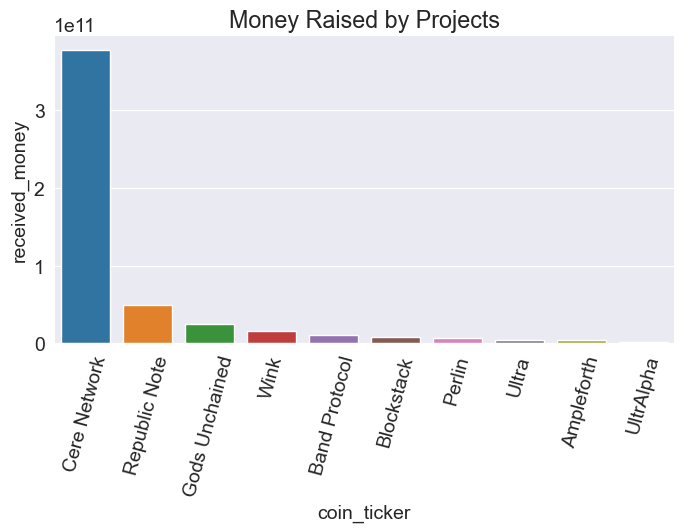

In [10]:
plt.figure(figsize=(8,4))
plt.title('Money Raised by Projects')
plt.xticks(rotation=75)
sns.barplot(x=ico_groupby_project_sorted.index, y=ico_groupby_project_sorted.received_money);

From this visualization, we can conclude that Cere Network raised funds higher than any other projects valued at 377 Billion

### 2) Goal Vs Received Funds
Now let's compare targeted amount vs received amount of those projects. At first let's filter out the projects that don't have any set goal

In [11]:
projects_with_goals=ico_groupby_project[ico_groupby_project.fundraising_goal>0]
projects_with_goals

,received_money,fundraising_goal
coin_ticker,,
ARTT Network,225000.0,100000.0
Agoric,90250000.0,70000000.0
Alaska Gold Rush,150000.0,100000.0
ArbiPad,1200000.0,1200000.0
Archway,27000000.0,6000000.0
...,...,...
Turbos Finance,3750000.0,750000.0
Uno Farm,540000.0,10000000.0
Web3Games,4000000.0,250000.0


So, here we can see that only 77 completed projects had set goals, now let's see how many of them were able to achieve that goal and try to visualize them

In [12]:
projects_goals={
    'achieved':len(projects_with_goals[projects_with_goals.fundraising_goal>=projects_with_goals.received_money]),
    'failed':len(projects_with_goals[projects_with_goals.fundraising_goal<projects_with_goals.received_money])
}
projects_goals_series=pd.Series(projects_goals)
projects_goals_series

achieved    21
failed      56
dtype: int64

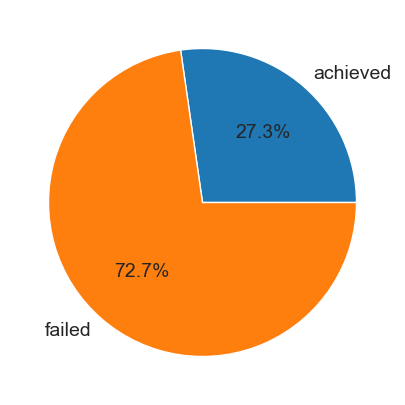

In [13]:
plt.pie(projects_goals_series, labels=projects_goals_series.index, autopct='%1.1f%%');

### 3) Role of Tokens
Now lets take a look at the role of tokens. From this part, we will use the raw data in order to include information from project with ongoing ICOs as well

In [14]:
ico_token_roles=ico_raw_data.groupby(ico_raw_data.coin_ticker)[['role_of_token']].first().reset_index()
ico_token_roles.role_of_token.unique()

array(['Utility', '9', 'Governance', '17', 'Switzerland', '7',
       '335 Madison Avenue, Suite 7E, New York, NY 10017'], dtype=object)

Here we can see there are some irrelevant values which shouldn't be in the column. So we filter out those values

In [15]:
ico_token_roles.drop(ico_token_roles[~ico_token_roles.role_of_token.isin(['Utility', 'Governance'])].index, inplace=True)
role_count=ico_token_roles.groupby('role_of_token').count()
role_count

,coin_ticker
role_of_token,
Governance,10
Utility,524


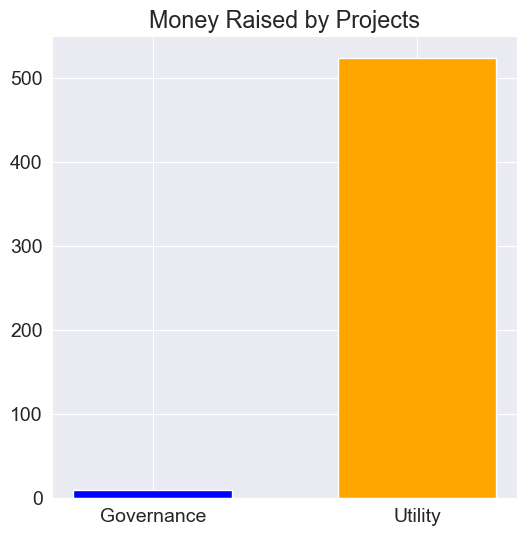

In [16]:
plt.figure(figsize=(6,6))
colors=['blue','orange']
plt.title('Money Raised by Projects')
plt.bar(role_count.index, role_count.coin_ticker,width=0.6, color=colors);

### 4) Project Categories
Let's have look a look at the types of the projects

In [25]:
grouped_data=ico_raw_data.groupby('coin_ticker')[['category']].first().reset_index()
raw_category_count=grouped_data.groupby('category').count().sort_values('coin_ticker',ascending=False)
raw_category_count.head()

,coin_ticker
category,
Blockchain Service,155
Platform,117
Protocol,86
Gaming,55
DeFi,21


Here we can see, most of the projects are Blockchain Service Providers, We can see a good number of Platform and Protocols as well, let's visualize them

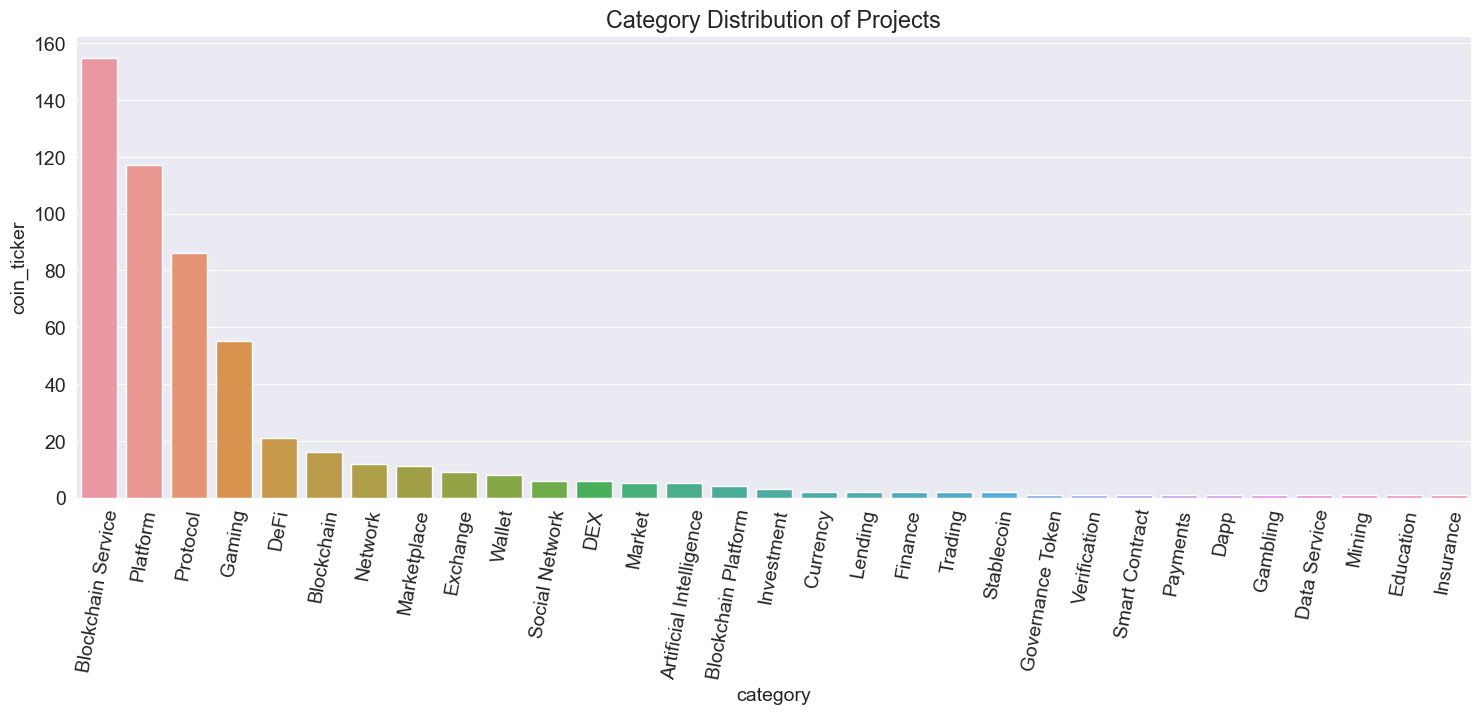

In [26]:
plt.figure(figsize=(18,6))
plt.title('Category Distribution of Projects')
plt.xticks(rotation=80)
sns.barplot(x=raw_category_count.index, y=raw_category_count.coin_ticker);

### 5) Relation between Project Category and Popularity
Now we will try to visualize and find relation between Project Category and Popularity

In [20]:
corr_df=ico_data.groupby(ico_data.coin_ticker)[['interest','category']].first().reset_index()
corr_df.interest.unique()

array(['Not Rated', '\r\nHigh ', 'Ticker: ACA', 'Ticker: BLD', None,
       '\r\nVery High ', 'Ticker: AXL', '\r\nMedium ', 'Ticker: CFG',
       'Ticker: COA', 'Ticker: COW', 'Ticker: XX', 'Ticker: SPX',
       'Ticker: FRONT', 'Ticker: GODS', 'Ticker: HDX', 'Ticker: IRON',
       'Ticker: KINE', 'Ticker: LITH', '\r\nWatch List ', 'Ticker: OIN',
       'Ticker: RADIX', 'Ticker: STG', 'Ticker: SWASH'], dtype=object)

Here we can see some irrelevant values in the interest field, so we drop them out

In [21]:
corr_df.drop(corr_df[~corr_df.interest.isin(['\nHigh ', '\nVery High ','\nMedium '])].index, inplace=True)

In [22]:
def clean (string):
    return string[1::]
corr_df['interest']=corr_df['interest'].apply(clean)

Now let's for a crosstab which contains number of ratings per category in a matrix likes structure

In [23]:
cross_tab = pd.crosstab(corr_df['category'], corr_df['interest'])
cross_tab=cross_tab.reindex(columns=['Medium ', 'High ', 'Very High '])

ValueError: zero-size array to reduction operation fmin which has no identity

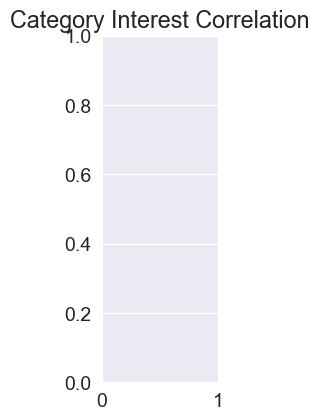

In [24]:
plt.figure(figsize=(1.5,4.5))
plt.title('Category Interest Correlation')
sns.heatmap(cross_tab, annot=False, cmap='Reds');

So, Here we can see that people are highly interested in Protocols and Blockchain Service providing companies

#### This project was part of Jovian's Data Analysis with Python: Zero to Pandas course. Here I tried to visualize data and also draw some conclusion out of the collected dataset. There were many missing data and also a lot of gibberish/irrelevant values, the analysis could have been a lot better with a complete dataset.